In [1]:
from bs4 import BeautifulSoup as BS
import requests
from time import sleep
from random import randint
import pandas as pd
import json
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

#### Load Web-scrapped clean data to Data Frame

In [2]:
df = pd.read_csv('final_zillow_group7.csv', usecols=range(1,20))
df.count()

StreetAddress    204
City             204
State            204
ZipCode          204
Latitude         204
Longitude        204
Price            204
YearBuilt        204
LotSize          204
HomeType         204
Zestimate        204
Bedrooms         204
Bathrooms        204
LivingArea       204
HOA              204
BrokerageName    204
LastSoldPrice    204
HomeStatus       204
Parking          204
dtype: int64

In [3]:
df.dtypes

StreetAddress     object
City              object
State             object
ZipCode            int64
Latitude         float64
Longitude        float64
Price              int64
YearBuilt          int64
LotSize            int64
HomeType          object
Zestimate          int64
Bedrooms           int64
Bathrooms          int64
LivingArea         int64
HOA                int64
BrokerageName     object
LastSoldPrice      int64
HomeStatus        object
Parking            int64
dtype: object

#### Change the data type of Zipcode and Convert City and State to Upper Case

In [4]:
df['ZipCode'] = df['ZipCode'].astype(str)
df['City']=df['City'].str.upper()
df['State']=df['State'].str.upper()
df.dtypes

StreetAddress     object
City              object
State             object
ZipCode           object
Latitude         float64
Longitude        float64
Price              int64
YearBuilt          int64
LotSize            int64
HomeType          object
Zestimate          int64
Bedrooms           int64
Bathrooms          int64
LivingArea         int64
HOA                int64
BrokerageName     object
LastSoldPrice      int64
HomeStatus        object
Parking            int64
dtype: object

#### Correlation Heat Map
Living Area is highly correlated to the price with 68%.
HOA is negatively related to the housing price

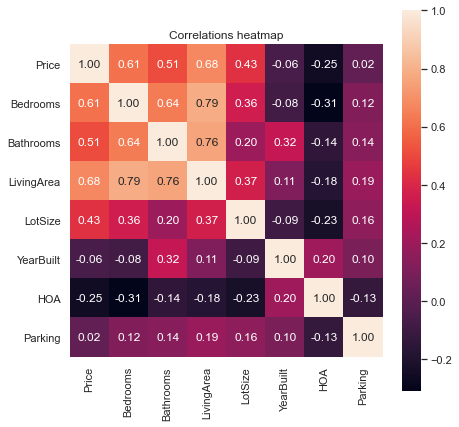

In [5]:
columns=['Price','Bedrooms','Bathrooms','LivingArea','LotSize','YearBuilt','HOA','Parking']
corrs = np.corrcoef(df[columns].values.T)
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = columns, xticklabels = columns).set_title('Correlations heatmap')

fig = hm.get_figure()

#### HomeType Vs Price
Single Family house is sold the most, and has the price varies from around $500,000 to more than $3,000,000

Text(0.5, 0, 'Price in $')

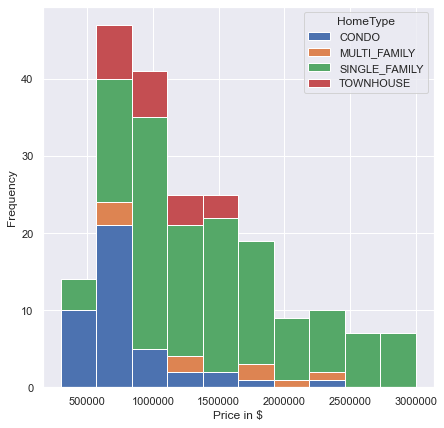

In [6]:
df.pivot(columns = 'HomeType', values = 'Price').plot.hist(stacked = True)
plt.ticklabel_format(style='plain')
plt.xlabel('Price in $')

#### YearBuild Vs Price
The year built does not seem to affect the housing price.

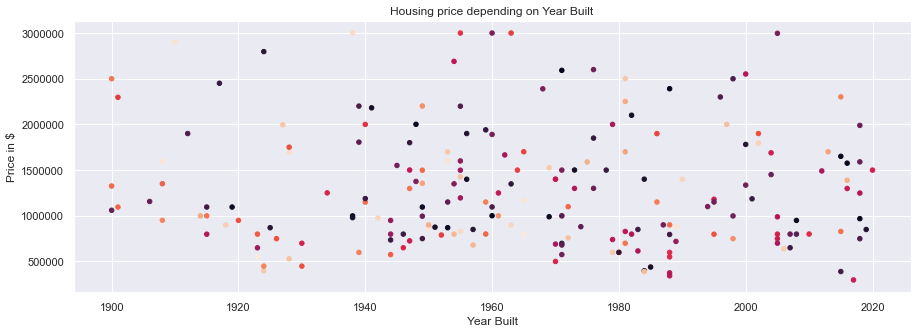

In [7]:
plt.figure(figsize=(15,5))
colors = np.random.rand(len(df))
area = 20 
plt.scatter(df['YearBuilt'],df['Price'] , s=area,c=colors, alpha=1)
plt.ticklabel_format(style='plain')
plt.xlabel('Year Built')
plt.ylabel('Price in $')
plt.title('Housing price depending on Year Built')
plt.show()

#### Median Price by HomeType
Single Family house has the maximum Median Price but the median price for Multi Family House is also almost same.

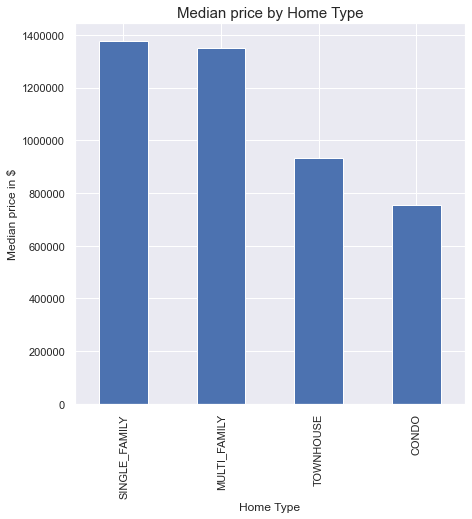

In [8]:
median_price_by_hometype = df.groupby(['HomeType'])['Price'].median()
median_price_by_hometypeSort = median_price_by_hometype.sort_values(ascending=False)
median_price_by_hometypeSort.plot.bar()
plt.ticklabel_format(style='plain',axis='y')
plt.ylabel('Median price in $')
plt.xlabel('Home Type')
plt.title('Median price by Home Type',fontsize=15)
plt.show() 

#### Median Price by HomeType and City
For Condo, Maximum is Palo Alto ,Minumum is San Mateo.
For Multi Family, Maximum is San Francisco ,Minumum is OakLand.
For Single Family, Maximum is Palo Alto ,Minumum is Oakland.
For TownHouse, Maximum is Danville ,Minumum is Hayward.

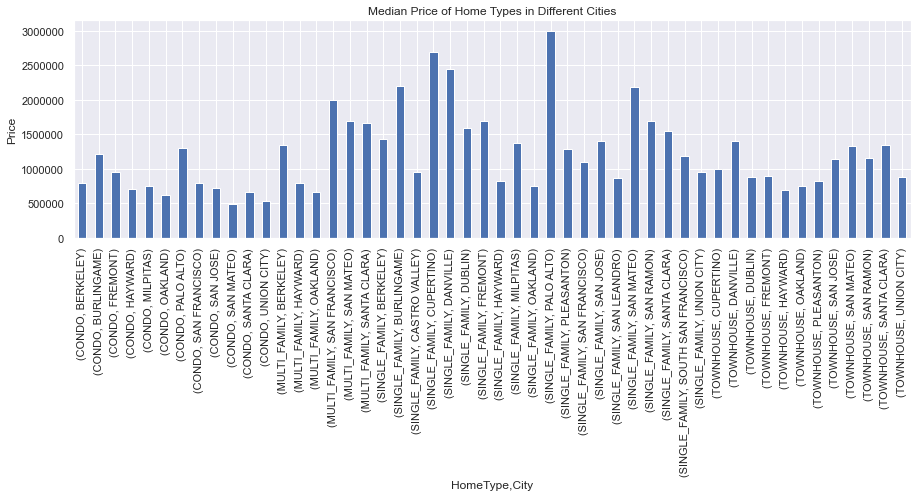

In [9]:
CityHTPrice= df.groupby(['HomeType','City'])['Price'].median()
CityHTPrice.plot(kind='bar', subplots=True, figsize=(15, 4))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Median Price of Home Types in Different Cities')
plt.ylabel('Price')
plt.show()

#### Median Price by City
Cupertino has the maximum median price followed by Danville

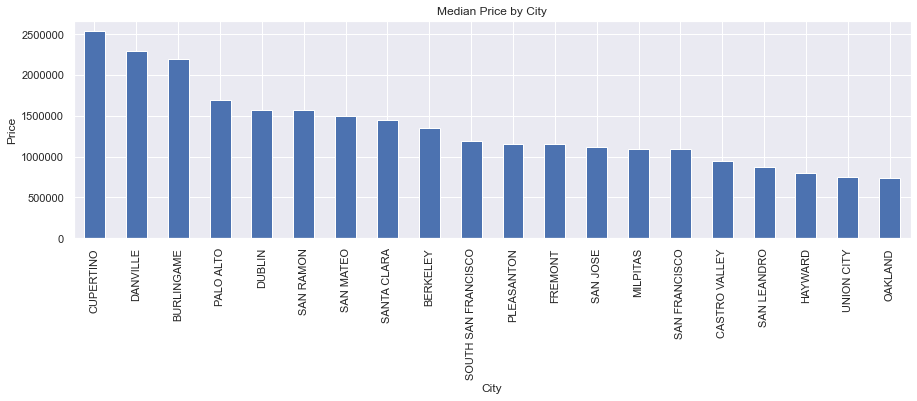

In [10]:
CityPrice= df.groupby(['City'])['Price'].median()
cityPriceSort = CityPrice.sort_values(ascending=False)
cityPriceSort.plot(kind='bar', subplots=True, figsize=(15, 4))
plt.title('Median Price by City')
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

#### Median Appriciation by City
Pleasanton has the maximum median appriciation followed by Danville

In [11]:
df.loc[df["LastSoldPrice"]>0, "Appreciation"] = (df['Price'] - df['LastSoldPrice'])/df['Price']

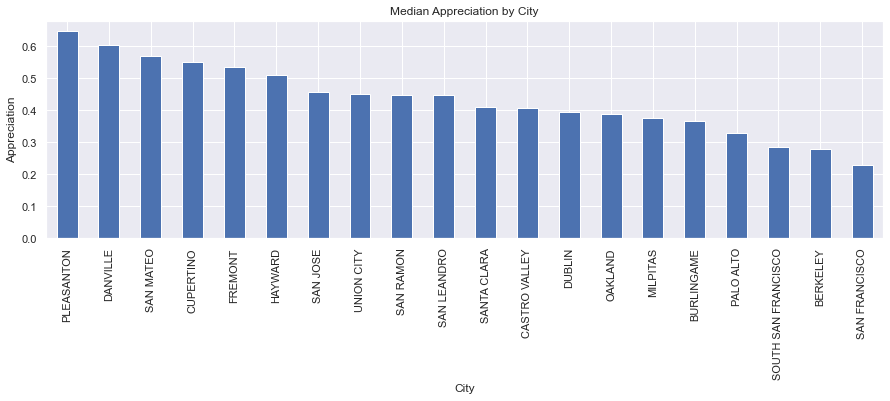

In [12]:
CityApp= df.groupby(['City'])['Appreciation'].median()
CityAppSort = CityApp.sort_values(ascending=False)
CityAppSort.plot(kind='bar', subplots=True, figsize=(15, 4))
plt.title('Median Appreciation by City')
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('City')
plt.ylabel('Appreciation')
plt.show()

#### No. of properties by City
San Jose has the maximum Number of listings followed by Oakland

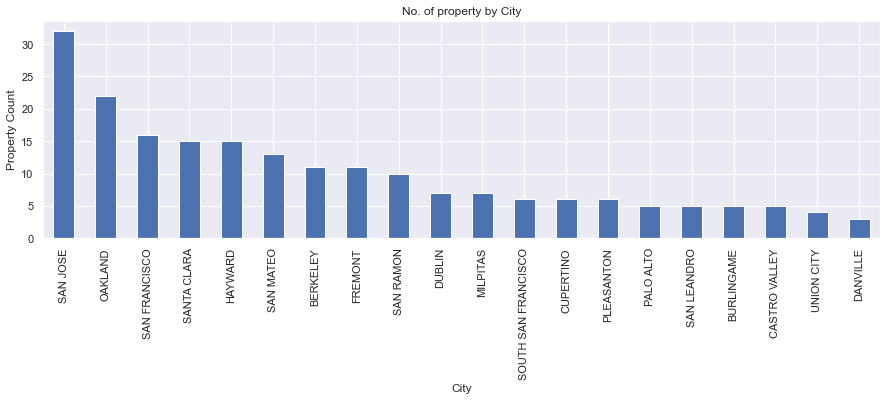

In [13]:
CityNum= df.groupby(['City'])['StreetAddress'].count()
CityNumSort = CityNum.sort_values(ascending=False)
CityNumSort.plot(kind='bar', subplots=True, figsize=(15, 4))
plt.title('No. of property by City')
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('City')
plt.ylabel('Property Count')
plt.show()

#### No. of properties by Broker
Compass has the maximum Number of listings followed by Keller Williams Realty

In [14]:
df.loc[(df["BrokerageName"].str.contains('KW', na=False)) | (df["BrokerageName"].str.contains('Keller', na=False)), "BrokerageName"] = "Keller Williams Realty"

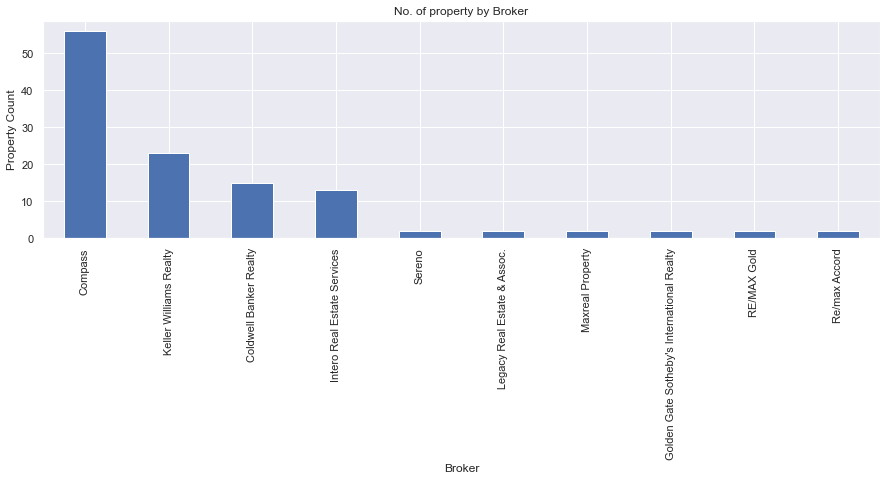

In [15]:
BrokerNum= df.groupby(['BrokerageName'])['StreetAddress'].count()
BrokerNumSort = BrokerNum.sort_values(ascending=False)
BrokerNumSort = BrokerNumSort.head(10)
BrokerNumSort.plot(kind='bar', subplots=True, figsize=(15, 4))
plt.title('No. of property by Broker')
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Broker')
plt.ylabel('Property Count')
plt.show()

## Model Formulation
#### Update LastSoldPrice to maintain missing values.

In [16]:
#df = df.drop(['LastSoldPrice1'], axis = 1) 
df.loc[df["LastSoldPrice"]>0, "UpdLastSoldPrice"] = df["LastSoldPrice"]
df.head()

,StreetAddress,City,State,ZipCode,Latitude,Longitude,Price,YearBuilt,LotSize,HomeType,...,Bedrooms,Bathrooms,LivingArea,HOA,BrokerageName,LastSoldPrice,HomeStatus,Parking,Appreciation,UpdLastSoldPrice
0,709 W Orange Ave,SOUTH SAN FRANCISCO,CA,94080,37.649730,-122.43276,949000,1944,3998,SINGLE_FAMILY,...,2,1,800,0,Coldwell Banker Realty,680000,FOR_SALE,0,0.283456,680000.0
1,814 Miller Ave,SOUTH SAN FRANCISCO,CA,94080,37.660213,-122.42690,1805000,1939,7000,SINGLE_FAMILY,...,4,3,2000,0,Keller Williams Realty,1605000,FOR_SALE,0,0.110803,1605000.0
2,353 Granada Dr,SOUTH SAN FRANCISCO,CA,94080,37.641360,-122.43593,1195000,1955,5250,SINGLE_FAMILY,...,3,1,1160,0,Sotheby's International Realty,0,FOR_SALE,2,NaN,NaN
3,10 Moonlight Ct,SOUTH SAN FRANCISCO,CA,94080,37.641700,-122.44822,1180000,1995,1865,SINGLE_FAMILY,...,3,3,1610,130,Compass,650000,FOR_SALE,3,0.449153,650000.0
4,389 Heather Way,SOUTH SAN FRANCISCO,CA,94080,37.666046,-122.43337,1349000,1954,4961,SINGLE_FAMILY,...,3,2,1575,0,Golden Gate Sotheby's International Realty,0,FOR_SALE,0,NaN,NaN


#### Choose Features to be used in Model.

In [17]:
cols = ['Bedrooms','Bathrooms','LivingArea','HOA','YearBuilt','HomeType','UpdLastSoldPrice','Parking','Zestimate']
dtf = df[cols+["Price"]]
dtf.head()

,Bedrooms,Bathrooms,LivingArea,HOA,YearBuilt,HomeType,UpdLastSoldPrice,Parking,Zestimate,Price
0,2,1,800,0,1944,SINGLE_FAMILY,680000.0,0,1152400,949000
1,4,3,2000,0,1939,SINGLE_FAMILY,1605000.0,0,1855500,1805000
2,3,1,1160,0,1955,SINGLE_FAMILY,NaN,2,1327500,1195000
3,3,3,1610,130,1995,SINGLE_FAMILY,650000.0,3,1339200,1180000
4,3,2,1575,0,1954,SINGLE_FAMILY,NaN,0,1171000,1349000


In [18]:
dtf = dtf.rename(columns={"Price":"Y"})

#### Split data intp training and test datasets.

In [41]:
dtf_train, dtf_test = model_selection.train_test_split(dtf, 
                      test_size=0.3)
dtf_train = dtf_train.drop("Zestimate",axis=1)
## print info
print("X_train shape:", dtf_train.drop("Y",axis=1).shape, "| X_test shape:", dtf_test.drop("Y",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["Y"]),2), "| y_test mean:", round(np.mean(dtf_test["Y"]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop("Y",axis=1).columns.to_list())

X_train shape: (142, 8) | X_test shape: (62, 9)
y_train mean: 1273624.13 | y_test mean: 1305480.4
9 features: ['Bedrooms', 'Bathrooms', 'LivingArea', 'HOA', 'YearBuilt', 'HomeType', 'UpdLastSoldPrice', 'Parking']


In [42]:
dtf_train["UpdLastSoldPrice"].isnull().sum()

29

#### Handle missing data for LastSoldPrice

In [43]:
dtf_train["UpdLastSoldPrice"].fillna(dtf_train["UpdLastSoldPrice"].mean(), inplace = True)

#### Convert dummy variables

In [44]:
dummy = pd.get_dummies(dtf_train["HomeType"], 
                       prefix="HomeType",drop_first=True)
dtf_train= pd.concat([dtf_train, dummy], axis=1)
print( dtf_train.filter(like="HomeType",axis=1).head() )
## drop the original categorical column
dtf_train = dtf_train.drop("HomeType", axis=1)

          HomeType  HomeType_MULTI_FAMILY  HomeType_SINGLE_FAMILY  \
23           CONDO                      0                       0   
9    SINGLE_FAMILY                      0                       1   
201      TOWNHOUSE                      0                       0   
192  SINGLE_FAMILY                      0                       1   
30           CONDO                      0                       0   

     HomeType_TOWNHOUSE  
23                    0  
9                     0  
201                   1  
192                   0  
30                    0  


In [45]:
dtf_train

,Bedrooms,Bathrooms,LivingArea,HOA,YearBuilt,UpdLastSoldPrice,Parking,Y,HomeType_MULTI_FAMILY,HomeType_SINGLE_FAMILY,HomeType_TOWNHOUSE
23,2,2,1032,389,1981,5.250000e+05,2,828000,0,0,0
9,4,4,2791,0,1910,2.650000e+06,0,2898000,0,1,0
201,3,3,1971,395,1984,4.400000e+05,2,1399950,0,0,1
192,4,2,1520,0,1978,7.024920e+05,2,1499000,0,1,0
30,3,3,1360,355,1988,8.000000e+05,0,795000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
132,3,2,1088,0,1953,6.070000e+05,2,869000,0,1,0
188,4,5,3135,160,2015,1.221000e+06,2,2299888,0,1,0
66,2,2,0,0,1928,8.720000e+05,3,1750000,0,1,0
146,4,5,2966,0,1927,2.343000e+06,2,1995000,0,1,0


#### Scale training data

In [46]:
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(dtf_train.drop("Y", axis=1))
dtf_train_scaled= pd.DataFrame(X, columns=dtf_train.drop("Y", 
                        axis=1).columns, index=dtf_train.index)
## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dtf_train_scaled["Y"] = scalerY.fit_transform(dtf_train["Y"].values.reshape(-1,1))
dtf_train_scaled.head()

,Bedrooms,Bathrooms,LivingArea,HOA,YearBuilt,UpdLastSoldPrice,Parking,HomeType_MULTI_FAMILY,HomeType_SINGLE_FAMILY,HomeType_TOWNHOUSE,Y
23,-0.5,0.0,-0.490074,1.560682,0.2875,-0.357101,0.5,0.0,-1.0,0.0,-0.309828
9,0.5,2.0,1.505389,0.000000,-1.4875,4.570435,-0.5,0.0,0.0,0.0,2.088165
201,0.0,1.0,0.575156,1.584754,0.3625,-0.554203,0.5,0.0,-1.0,1.0,0.352748
192,0.5,0.0,0.063528,0.000000,0.2125,0.054474,0.5,0.0,0.0,0.0,0.467493
30,0.0,1.0,-0.117981,1.424273,0.4625,0.280580,-0.5,0.0,-1.0,0.0,-0.348056


In [47]:
dtf_test["UpdLastSoldPrice"].isnull().sum()

10

In [48]:
dtf_test["UpdLastSoldPrice"].fillna(dtf_test["UpdLastSoldPrice"].mean(), inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [49]:
dummy = pd.get_dummies(dtf_test["HomeType"], 
                       prefix="HomeType",drop_first=True)
dtf_test= pd.concat([dtf_test, dummy], axis=1)
print( dtf_test.filter(like="HomeType",axis=1).head() )
## drop the original categorical column
dtf_test = dtf_test.drop("HomeType", axis=1)

          HomeType  HomeType_MULTI_FAMILY  HomeType_SINGLE_FAMILY  \
72   SINGLE_FAMILY                      0                       1   
102          CONDO                      0                       0   
104  SINGLE_FAMILY                      0                       1   
62           CONDO                      0                       0   
133  SINGLE_FAMILY                      0                       1   

     HomeType_TOWNHOUSE  
72                    0  
102                   0  
104                   0  
62                    0  
133                   0  


#### Scale Test data

In [50]:
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(dtf_test.drop("Y", axis=1))
dtf_test_scaled= pd.DataFrame(X, columns=dtf_test.drop("Y", 
                        axis=1).columns, index=dtf_test.index)
## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dtf_test_scaled["Y"] = scalerY.fit_transform(dtf_test["Y"].values.reshape(-1,1))
dtf_test_scaled.head()

,Bedrooms,Bathrooms,LivingArea,HOA,YearBuilt,UpdLastSoldPrice,Parking,Zestimate,HomeType_MULTI_FAMILY,HomeType_SINGLE_FAMILY,HomeType_TOWNHOUSE,Y
72,0.0,0.0,0.160895,0.000000,-0.023121,1.016652,-0.5,2.409056,0.0,0.0,0.0,2.729902
102,-0.5,1.0,-0.371573,1.725916,1.132948,-0.341805,-0.5,-0.614057,0.0,-1.0,0.0,-0.552416
104,0.0,0.0,-0.525974,0.000000,0.115607,0.254163,0.5,0.122524,0.0,0.0,0.0,0.119405
62,-1.0,-1.0,-0.882395,3.527815,0.369942,-0.341805,0.0,-0.789892,0.0,-1.0,0.0,-0.613444
133,0.5,0.0,-0.191198,0.000000,-0.115607,-0.464505,-0.5,-0.575226,0.0,0.0,0.0,-0.438814


### Feature selection

Text(0.5, 1.0, 'pearson correlation')

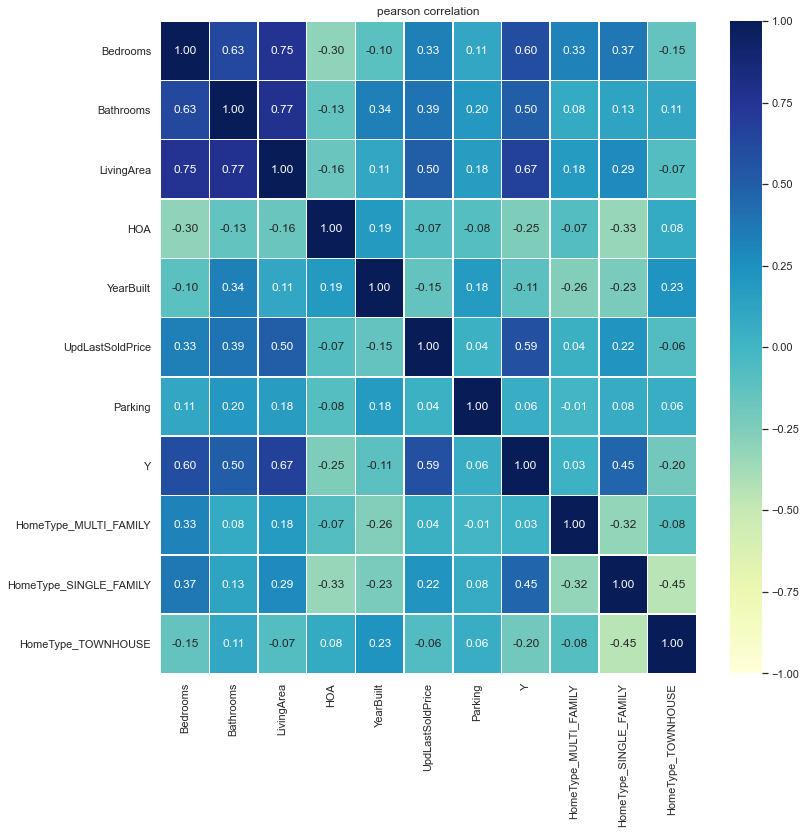

In [51]:
fig, ax = plt.subplots(figsize=(12,12))      
corr_matrix = dtf_train.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5, ax = ax)
plt.title("pearson correlation")

<AxesSubplot:xlabel='selection', ylabel='features'>

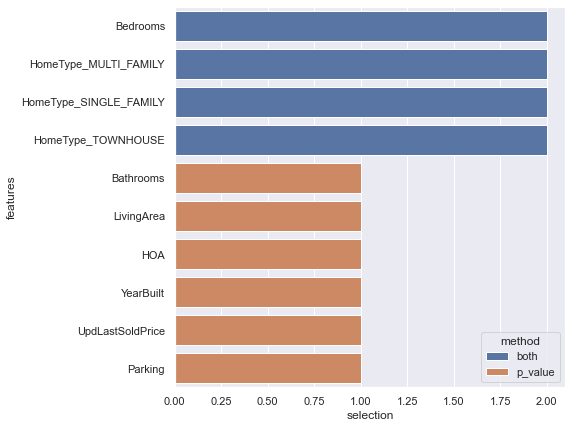

In [52]:
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns
## p-value
selector = feature_selection.SelectKBest(score_func= feature_selection.f_regression, k=10).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.Ridge(alpha=1.0, fit_intercept=True), 
                                 max_features=10).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]


## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

   IMPORTANCE                VARIABLE
2    0.593323              LivingArea
5    0.179349        UpdLastSoldPrice
4    0.094189               YearBuilt
3    0.056409                     HOA
8    0.039724  HomeType_SINGLE_FAMILY
0    0.015805                Bedrooms
6    0.010250                 Parking
1    0.010022               Bathrooms
7    0.000929   HomeType_MULTI_FAMILY
9    0.000000      HomeType_TOWNHOUSE


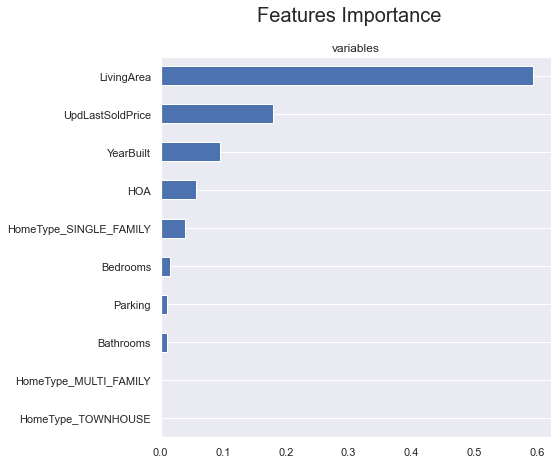

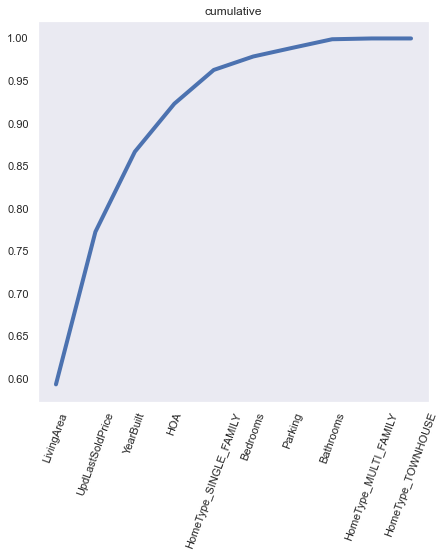

In [53]:
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
print(dtf_importances)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")

## Plot
#fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig, ax = plt.subplots()
fig.suptitle("Features Importance", fontsize=20)
ax.title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax).grid(axis="x")
ax.set(ylabel="")
plt.show()
fig, ax = plt.subplots()
ax.title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax)
ax.set(xlabel="", xticks=np.arange(len(dtf_importances)), xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

#### Keeping Most Important Features

In [82]:
X_names = ['LivingArea', 'UpdLastSoldPrice', 'HOA', 'YearBuilt']
X_train = dtf_train_scaled[X_names].values
y_train = dtf_train_scaled["Y"].values
X_test = dtf_test_scaled[X_names].values
y_test = dtf_test_scaled["Y"].values

### Call Model - Linear Regression

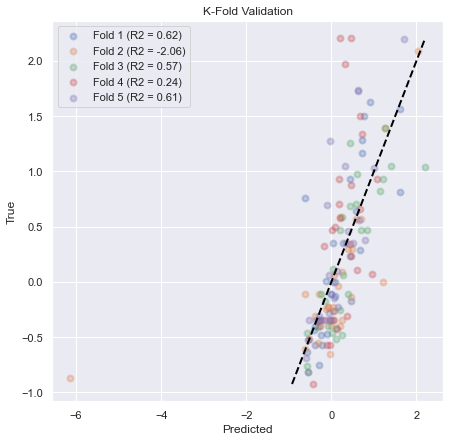

In [83]:
model = linear_model.LinearRegression()

scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

### Call Model - Gradient Boosting

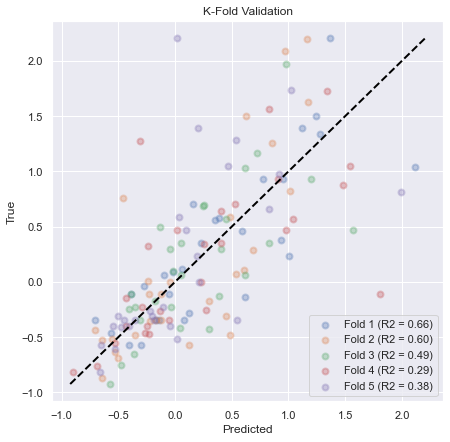

In [84]:
model = ensemble.GradientBoostingRegressor()
param_dic = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],      
             #weighting factor for the corrections by new trees when added to the model
             'n_estimators':[100,250,500,750,1000,1250,1500,1750],  
             #number of trees added to the model
             'max_depth':[2,3,4,5,6,7],                             
             #maximum depth of the tree
             'min_samples_split':[2,4,6,8,10,20,40,60,100],         
             #sets the minimum number of samples to split
             'min_samples_leaf':[1,3,5,7,9],                        
             #the minimum number of samples to form a leaf
             'max_features':[2,3,4,5,6,7],                          
             #square root of features is usually a good starting point
             'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]            
             #the fraction of samples to be used for fitting the individual base learners. Values lower than 1
            }
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

#### Using Liner Gradient Boosting

In [85]:
model = ensemble.GradientBoostingRegressor()
## train
model.fit(X_train, y_train)
## test
predicted = model.predict(X_test)

In [86]:
predicted = scalerY.inverse_transform(predicted.reshape(-1,1) ).reshape(-1)
y_test = scalerY.inverse_transform(y_test.reshape(-1,1) ).reshape(-1)

In [87]:
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
## residuals
residuals = y_test - predicted
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], predicted[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))

R2 (explained variance): 0.42
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.27
Mean Absolute Error (Σ|y-pred|/n): 362,179
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 482,743
Max Error: 1,618,026


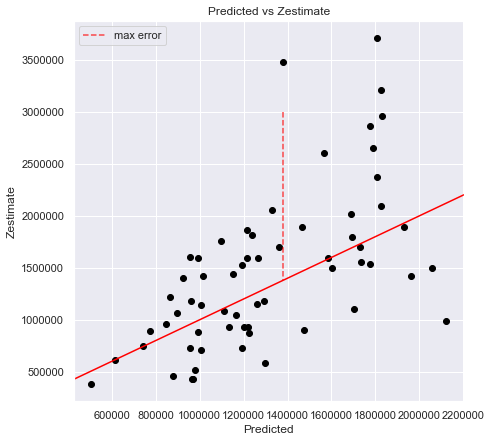

In [88]:
Zest = dtf_test["Zestimate"]
Zest
fig, ax = plt.subplots(nrows=1, ncols=1)
from statsmodels.graphics.api import abline_plot
ax.ticklabel_format(style='plain')
ax.scatter(predicted, Zest, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax)
ax.vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="Zestimate", title="Predicted vs Zestimate")
ax.legend()

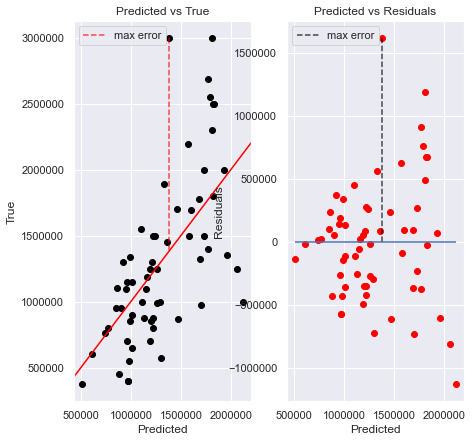

In [89]:
## Plot predicted vs true
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].ticklabel_format(style='plain')
ax[0].scatter(predicted, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()
    
## Plot predicted vs residuals
ax[1].scatter(predicted, residuals, color="red")
ax[1].ticklabel_format(style='plain')
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
ax[1].hlines(y=0, xmin=np.min(predicted), xmax=np.max(predicted))
ax[1].legend()
plt.show()